In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_vectors
import torch

Before: [3 1]
After: [ 3 -1]


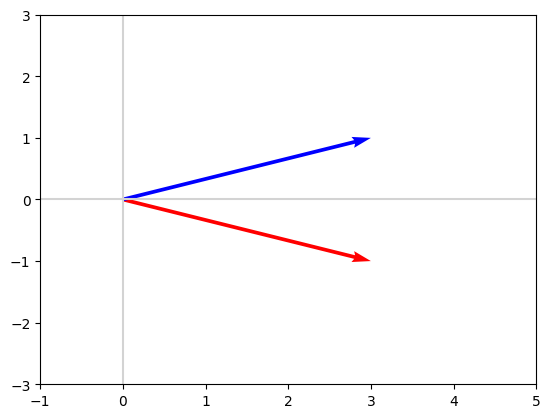

In [12]:
# Flipping vectors over the x-axis
X = np.array([3, 1])

print(f"Before: {X}")

E = np.array([[1, 0], [0, -1]])

flipped = np.dot(X, E)

print(f"After: {flipped}")

plot_vectors([flipped, X ], colors=["red", "blue"])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

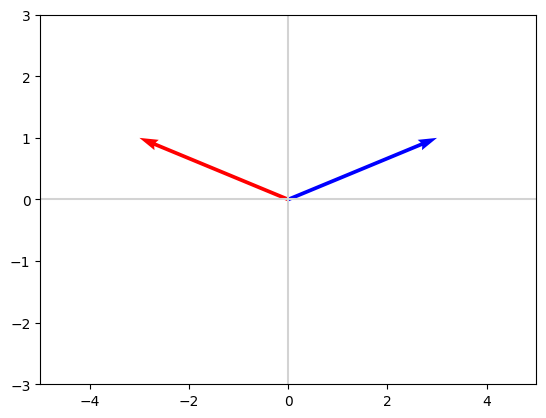

In [16]:
# Flipping over the y-axis

flippedY = np.dot(X, np.array([[-1, 0], [0, 1]]))

plot_vectors([flippedY, X], colors=["red", "blue"])
plt.xlim(-5, 5)
_ = plt.ylim(-3, 3)

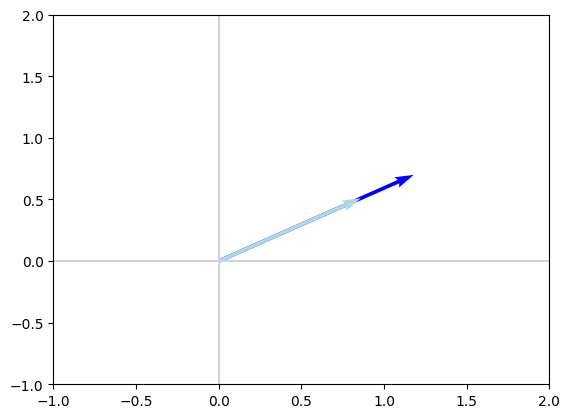

In [41]:
A = np.array([[-1, 4], [2, -2]])


# Create an eigenvector
lambdas, V = np.linalg.eig(A)

v = V[:, 0]

Av = np.dot(A, v)

plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

#### Eigendecomposition formula: A = VAV(-1)

In [ ]:
# Use PyTorch to decompose the matrix P into its components V, A and V(-1).
## Confirm that P = VAV(-1)

In [34]:
P = torch.tensor([[25., 2., -5.], [3., -2., 1.], [5., 7., 4.]], dtype=torch.float64)

# Calculate eigenvalues and eigenvectors of P
lambdas, V = torch.linalg.eig(P)

# Convert eigenvalues to diagonal matrix
Lambda = torch.diag(lambdas)

# Calculate the inverse of eigenmatrix
V_inv = torch.inverse(V) # same as np.linalg.inv

# Reconstruct the original matrix
A = torch.matmul(V, torch.matmul(Lambda, V_inv)) # same as np.dot

# Compare P with just the real numbers of A and check if they're close enough to be
# taken as "equal"
tolerance = 1e-10
torch.allclose(P, torch.real(A), atol=tolerance)

True

With real symmetric matrices, the process is more efficient using formula
- A = QaQ(T)
  - Being Q an orthogonal matrix, and a (not the exact symbol) being the diagonal of the eigenmatrix

In [39]:
# Use PyTorch to decompose the symmetric matrix S into its components V, A and V(-1).
## Confirm that S = QAQ(T)
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])

lambdas, Q = torch.linalg.eig(S)

# Calculate diagonal of eigenmatrix
Lambda = torch.diag(lambdas)

# QAQ(T)
A = torch.matmul(Q, torch.matmul(Lambda, Q.T))

# S = QAQ(T)
torch.allclose(torch.real(A), S)

True

### Singular Value Decomposition (SVD)
Formula: A = UDV(T)

In [32]:
P = torch.tensor([[25., 2., -5.], [3., -2., 1.], [5., 7., 4.]], dtype=torch.float64)

# Decompose in S, d and V(T)
U, d, VT = torch.linalg.svd(P)

# Convert d to the expected shape matrix
D = torch.diag(d)

# Reconstruct A
A = torch.matmul(U, torch.matmul(D, VT))

# Check
print(f"Well reconstructed => {torch.allclose(A, P)}")

eigen = torch.linalg.eig(torch.matmul(A, A.T))

print(A)
print(torch.diag(lambdas))

eigen.eigenvectors
# Left-singular vectors of A = eigenvectors of AA(T)
#torch.allclose(U, lambdas)

Well reconstructed => True
tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]], dtype=torch.float64)
tensor([[684.5149+0.j,   0.0000+0.j,   0.0000+0.j],
        [  0.0000+0.j,  67.0359+0.j,   0.0000+0.j],
        [  0.0000+0.j,   0.0000+0.j,   6.4492+0.j]], dtype=torch.complex128)


tensor([[ 0.9757+0.j,  0.1823+0.j,  0.1214+0.j],
        [ 0.0975+0.j,  0.1350+0.j, -0.9860+0.j],
        [ 0.1961+0.j, -0.9739+0.j, -0.1140+0.j]], dtype=torch.complex128)

In [36]:
A_p = torch.tensor([[-1.,  2.],
                    [ 3., -2.],
                    [ 5.,  7.]])

A_p_trace = torch.trace(A_p)

A_p_norm = torch.norm(A_p)

# Demonstrate that ||A||f = Root(Tr(AA(T)))
A_p_norm == np.sqrt(torch.trace(torch.matmul(A_p, A_p.T)))

tensor(True)

: 